### This script defines routes for preprocessing data before analysis. It includes methods for reading data from CSV files and performing initial preprocessing steps.

#### Usage:
    This script is intended to be run as part of a Flask application. It provides routes for preprocessing data before analysis.

#### Attributes:
    app: Flask application instance.
    preprocessing_routes: Blueprint containing routes for data preprocessing.


In [1]:
# pip install flask
# pip install numpy pandas matplotlib seaborn


In [2]:
from flask import Blueprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

preprocessing_app = Blueprint("preprocessing", __name__)

data = None

In [4]:
df = pd.read_csv("F:\DataScience\code\Real-Time-Glassdoor-Data\data\glassdoor_company.csv")
print(df)

   company_id                                            name  \
0     1145391                                         Goo.Com   
1     8070755                                   Stichting GOO   
2      939648                            Goo-Goo Express Wash   
3     3651112                                       Black Goo   
4     1895285                                Let's Goo Social   
5     5953502                                 Goo Goo Gaa Gaa   
6      107591                                            WATG   
7      923128                                Goo Technologies   
8      812843  Pwi-Di-Goo-Zing Ne-Yaa-Zhing Advisory Services   
9     2888762                          Dembach Goo Informatik   

                                        company_link  rating  review_count  \
0  https://www.glassdoor.com/Overview/Working-at-...     4.3             2   
1  https://www.glassdoor.com/Overview/Working-at-...     0.0             0   
2  https://www.glassdoor.com/Overview/Working-at-.

In [5]:
missing = df.isnull().sum()

print(missing)

company_id               0
name                     0
company_link             0
rating                   0
review_count             0
salary_count             0
job_count                0
headquarters_location    0
logo                     4
company_size             0
company_size_category    0
company_description      8
industry                 3
dtype: int64


In [6]:
df.dropna(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Recalculate missing values after cleaning
missing = df.isnull().sum()

# Display the number of missing values after cleaning
print("\nMissing values after cleaning:")
print(missing)


Missing values after cleaning:
company_id               0
name                     0
company_link             0
rating                   0
review_count             0
salary_count             0
job_count                0
headquarters_location    0
logo                     0
company_size             0
company_size_category    0
company_description      0
industry                 0
dtype: int64


In [7]:
print(df.dtypes)

company_id                 int64
name                      object
company_link              object
rating                   float64
review_count               int64
salary_count               int64
job_count                  int64
headquarters_location     object
logo                      object
company_size              object
company_size_category     object
company_description       object
industry                  object
dtype: object


In [8]:
# Update data types
df['company_id'] = df['company_id'].astype('int32')   
df['rating'] = df['rating'].astype('float32')  
df['review_count'] = df['review_count'].astype('int32')
df['salary_count'] = df['salary_count'].astype('int32')
df['job_count'] = df['job_count'].astype('int32')

# Display the updated DataFrame with new data types
print("\nData Types after updating:")
print(df.dtypes)


Data Types after updating:
company_id                 int32
name                      object
company_link              object
rating                   float32
review_count               int32
salary_count               int32
job_count                  int32
headquarters_location     object
logo                      object
company_size              object
company_size_category     object
company_description       object
industry                  object
dtype: object


### let's visualize review_count for each company

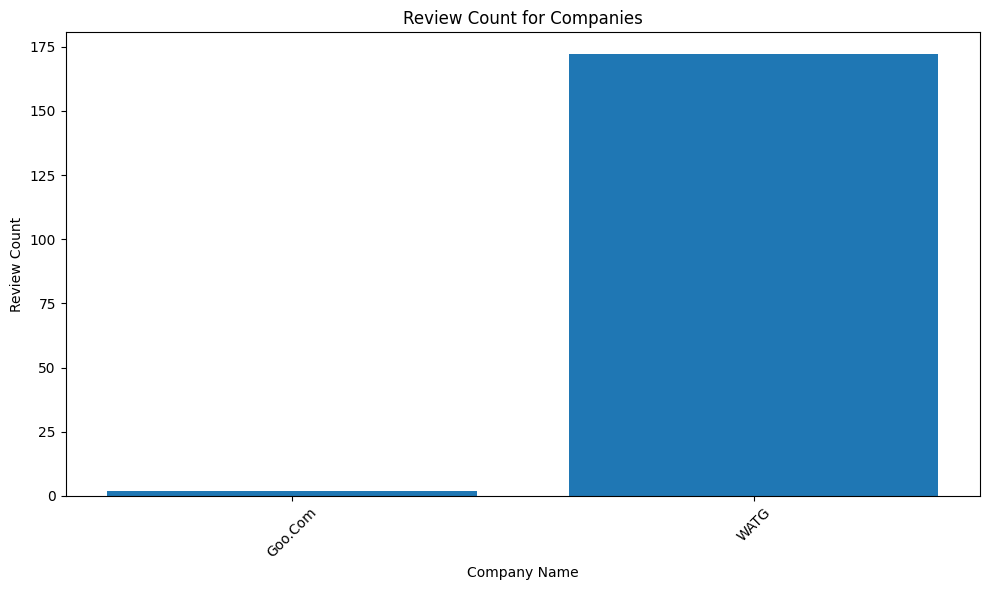

In [22]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['name'], df['review_count'])
plt.xlabel('Company Name')
plt.ylabel('Review Count')
plt.title('Review Count for Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### let's visualize the distribution of rating

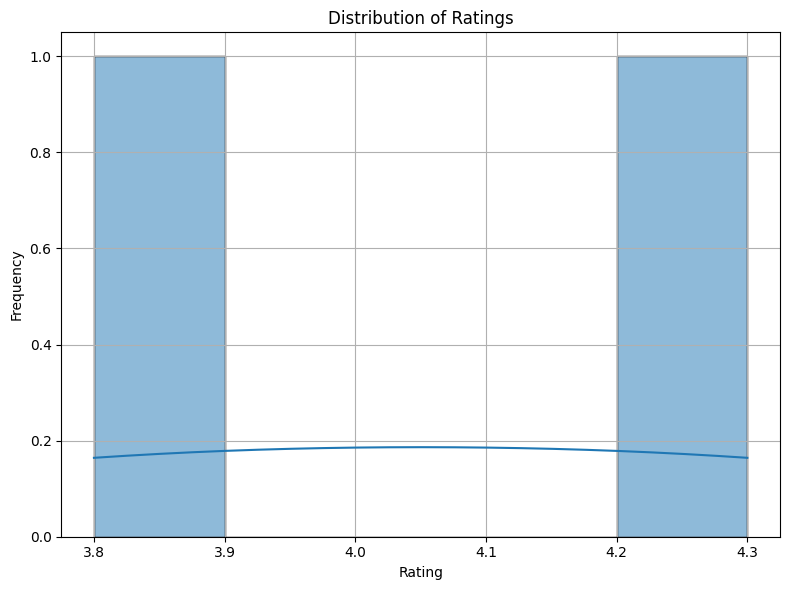

In [20]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=5, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.grid(True)
plt.tight_layout()
plt.show()